# Análisis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np

In [3]:
# Lista de nombres de los modelos que vamos a procesar
model_names = ["BalancedRandomForest", "SVM", "LogisticRegression", "NeuralNet"]

# Lista para almacenar los DataFrames de cada modelo
all_dfs = []

# Cargar archivos CSV de resultados para cada modelo
for model in model_names:
    file_name = f"{model.lower()}_cv_results.csv"  # Nombre esperado del archivo
    if os.path.exists(file_name):
        df = pd.read_csv(file_name)
        df.columns = df.columns.str.strip()  # Eliminar espacios en nombres de columnas
        df["model"] = model  # Añadir columna para identificar el modelo
        all_dfs.append(df)
    else:
        print(f"Archivo no encontrado: {file_name}")

# Unir todos los DataFrames en uno solo
df = pd.concat(all_dfs, ignore_index=True)

# Convertir columnas 'split' y 'fold' a valores numéricos, ignorando errores
df["split"] = pd.to_numeric(df["split"], errors="coerce")
df["fold"] = pd.to_numeric(df["fold"], errors="coerce")

# Eliminar filas donde 'split' o 'fold' sean NaN (no convertibles)
df = df.dropna(subset=["split", "fold"])

# Filtrar solo los splits entre 1 y 10 (inclusive)
df = df[df["split"].between(1, 10)]

# Obtener listas de splits y modelos únicos para iterar después
splits = sorted(df["split"].unique())
models = df["model"].unique()



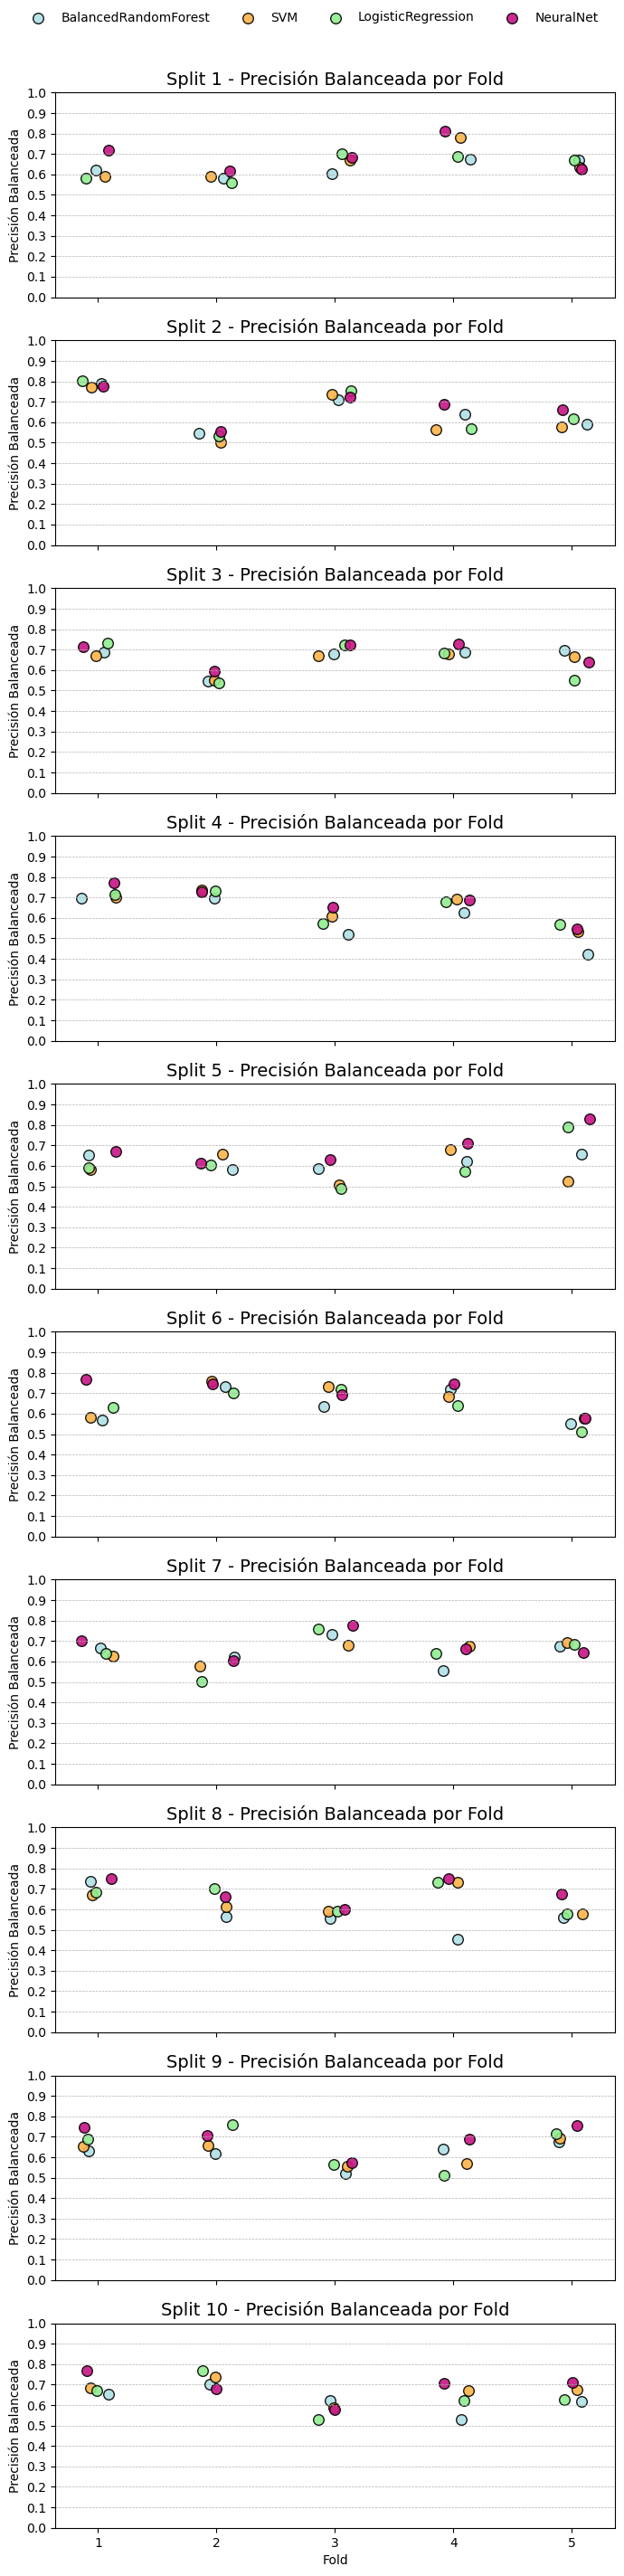

In [6]:
# Crear subplots: una fila por cada split
fig, axes = plt.subplots(len(splits), 1, figsize=(7, 3 * len(splits)), sharex=True)

# Si solo hay un split, convertir axes a lista para facilitar iteración
if len(splits) == 1:
    axes = [axes]

# Definir marcadores y colores consistentes para cada modelo
marker_map = {
    "BalancedRandomForest": "o",
    "SVM": "o",
    "LogisticRegression": "o",
    "NeuralNet": "o"
}
color_map = {
    "BalancedRandomForest": "#B0E0E6",  # cian pastel
    "SVM": "#FFB347",                   # naranja pastel
    "LogisticRegression": "#90EE90",   # verde claro
    "NeuralNet": "#C71585"              # rosa medio (MediumVioletRed)
}

# Variables para guardar leyenda y evitar duplicados
handles, labels = None, None

# Iterar por cada split y graficar los resultados por fold y modelo
for i, split in enumerate(splits):
    ax = axes[i]
    split_df = df[df["split"] == split]

    for model in models:
        model_df = split_df[split_df["model"] == model]

        # Añadir jitter a la posición x para evitar solapamiento de puntos
        jittered_x = model_df["fold"] + (np.random.rand(len(model_df)) - 0.5) * 0.3

        ax.scatter(
            jittered_x,
            model_df["balanced_accuracy"],
            label=model,
            marker=marker_map.get(model, "o"),
            color=color_map.get(model, "gray"),
            edgecolor="black",
            s=70,
            alpha=0.9
        )

    # Configuración del título y etiquetas de cada subplot
    ax.set_title(f"Split {int(split)} - Precisión Balanceada por Fold", fontsize=14)
    ax.set_ylabel("Precisión Balanceada")
    ax.set_ylim(0, 1)
    ax.set_yticks([round(x * 0.1, 1) for x in range(11)])
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

    # Guardar handles y labels para la leyenda una sola vez
    if handles is None or labels is None:
        handles, labels = ax.get_legend_handles_labels()

# Etiqueta del eje x en el último subplot
axes[-1].set_xlabel("Fold")

# Agregar leyenda global arriba del todo con todos los modelos
fig.legend(handles, labels, loc='upper center', ncol=len(models), fontsize='medium', frameon=False)

# Ajustar layout dejando espacio para la leyenda
plt.tight_layout(rect=[0, 0.05, 1, 0.98])

# Mostrar gráfica
plt.savefig("all_values.png", dpi=300)
plt.show()

In [14]:
# Iterar por cada split y guardar una figura individual
for split in splits:
    fig, ax = plt.subplots(figsize=(7, 4))

    split_df = df[df["split"] == split]

    handles, labels = [], []

    for model in models:
        model_df = split_df[split_df["model"] == model]
        jittered_x = model_df["fold"] + (np.random.rand(len(model_df)) - 0.5) * 0.3

        sc = ax.scatter(
            jittered_x,
            model_df["balanced_accuracy"],
            label=model,
            marker=marker_map.get(model, "o"),
            color=color_map.get(model, "gray"),
            edgecolor="black",
            s=70,
            alpha=0.9
        )

        handles.append(sc)
        labels.append(model)

    ax.set_title(f"Split {int(split)} - Precisión Balanceada por Fold", fontsize=14)
    ax.set_ylabel("Precisión Balanceada")
    ax.set_xlabel("Fold")
    ax.set_xlim(0.5, 5.5)  # Set fixed range for folds 1 to 5
    ax.set_xticks([1, 2, 3, 4, 5])  # Ensure ticks are only at whole numbers
    ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)  # Grid on both axes

    ax.set_ylim(0, 1)
    ax.set_yticks([round(x * 0.1, 1) for x in range(11)])
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

    ax.legend(loc='upper center', ncol=len(models), fontsize='small', frameon=False)

    plt.tight_layout()

    # Guardar la figura individual
    filename = f"split_{int(split)}_balanced_accuracy.png"
    plt.savefig(filename, dpi=300)
    plt.close()

C:\Users\nerea\AppData\Local\Temp\ipykernel_13336\2180495514.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


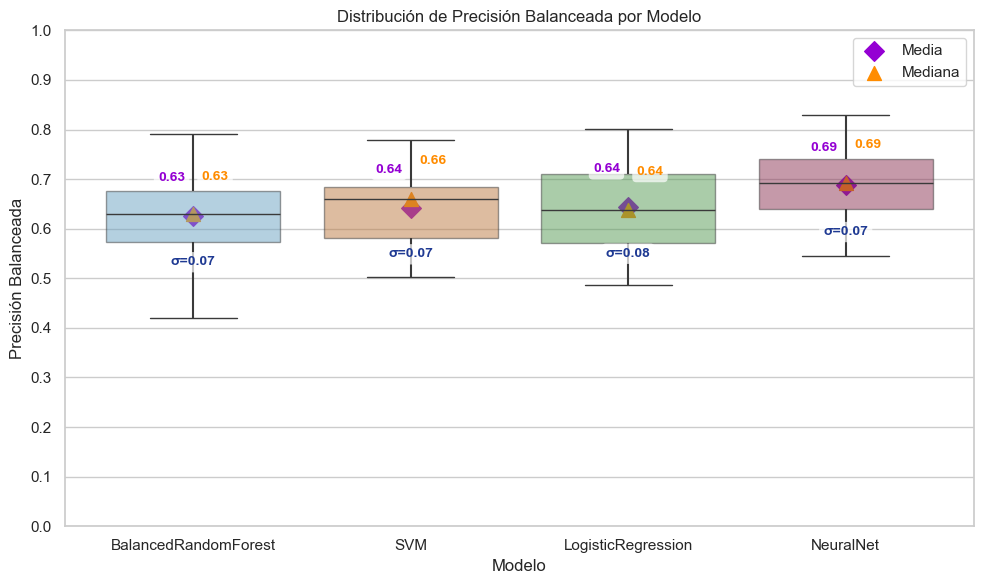

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo del gráfico con Seaborn
sns.set(style="whitegrid")

# Definir un mapa de colores más oscuro para cada modelo basado en tonos pastel
color_map = {
    "BalancedRandomForest": "#5CA6D1",  # cian oscuro
    "SVM": "#D17A2D",                   # naranja pastel oscuro
    "LogisticRegression": "#4BA64A",   # verde claro oscuro
    "NeuralNet": "#9B2551"              # MediumVioletRed oscuro
}

# Crear la figura y el eje del gráfico con un tamaño definido
plt.figure(figsize=(10, 6))

# Graficar el boxplot con los datos agrupados por modelo y precisión balanceada
ax = sns.boxplot(
    data=df, 
    x="model", 
    y="balanced_accuracy", 
    palette=color_map,           # usar los colores definidos
    boxprops=dict(alpha=0.5),   # transparencia de las cajas
    whiskerprops={'linewidth':1.5}  # grosor de las líneas de los bigotes
)

# Obtener la lista de modelos únicos para iterar sobre ellos
models = df['model'].unique()

# Para cada modelo, calcular y graficar la media, mediana y desviación estándar con anotaciones
for i, model in enumerate(models):
    data = df.loc[df['model'] == model, 'balanced_accuracy']  # datos de precisión para ese modelo
    mean_val = data.mean()        # calcular media
    median_val = data.median()    # calcular mediana
    std_val = data.std()          # calcular desviación estándar
    
    # Graficar la media como un diamante violeta oscuro
    plt.scatter(i, mean_val, color='darkviolet', marker='D', s=100, label='Media' if i == 0 else "")
    # Graficar la mediana como un triángulo naranja oscuro
    plt.scatter(i, median_val, color='darkorange', marker='^', s=100, label='Mediana' if i == 0 else "")
    
    # Anotar el valor de la media
    plt.text(i - 0.1, mean_val + 0.07, f"{mean_val:.2f}", color='darkviolet', ha='center', 
             fontsize=10, fontweight='bold',
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.3'))
    # Anotar el valor de la mediana
    plt.text(i + 0.1, median_val + 0.07, f"{median_val:.2f}", color='darkorange', ha='center', 
             fontsize=10, fontweight='bold',
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.3'))
    # Anotar la desviación estándar
    plt.text(i, mean_val - 0.1, f"σ={std_val:.2f}", color='#1F3A93', ha='center', 
             fontsize=10, fontweight='bold',
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.3'))


# Título y etiquetas de los ejes en español
plt.title("Distribución de Precisión Balanceada por Modelo")
plt.ylabel("Precisión Balanceada")
plt.xlabel("Modelo")

# Ajustar límites y ticks del eje Y para que vaya de 0 a 1 en incrementos de 0.1
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))

# Mostrar leyenda para media y mediana (solo una vez cada una)
plt.legend()

# Ajustar el layout para que no se sobreponga nada
plt.tight_layout()

# Mostrar el gráfico
plt.savefig("boxplot_per_model.png", dpi=300)
plt.show()


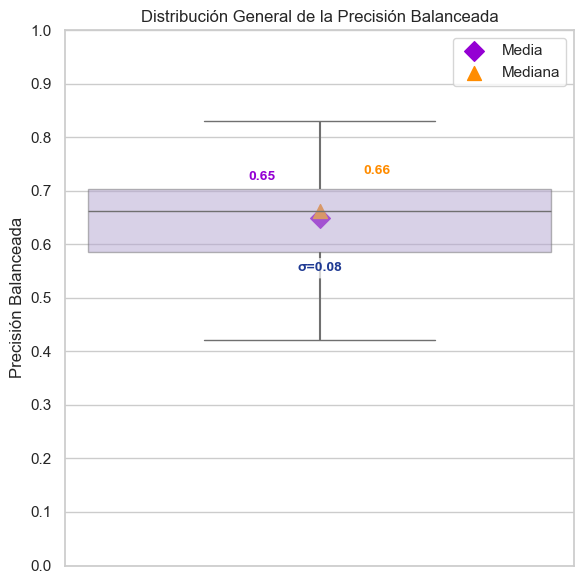

In [9]:
# Crear figura cuadrada para el boxplot
plt.figure(figsize=(6, 6))

# Graficar boxplot combinado para toda la precisión balanceada con color violeta pastel y transparencia
sns.boxplot(
    data=df, 
    y="balanced_accuracy", 
    color="#b19cd9",                # color violeta pastel
    boxprops=dict(alpha=0.5),       # transparencia de la caja
    whiskerprops={'linewidth':1.5} # grosor de los bigotes
)

# Calcular media, mediana y desviación estándar de toda la columna 'balanced_accuracy'
mean_val = df['balanced_accuracy'].mean()
median_val = df['balanced_accuracy'].median()
std_val = df['balanced_accuracy'].std()

# Graficar la media como un diamante violeta oscuro
plt.scatter(0, mean_val, color='darkviolet', marker='D', s=100, label='Media')
# Graficar la mediana como un triángulo naranja oscuro
plt.scatter(0, median_val, color='darkorange', marker='^', s=100, label='Mediana')

# Anotar la media justo arriba y ligeramente a la izquierda del punto
plt.text(
    -0.1, mean_val + 0.07, f"{mean_val:.2f}", color='darkviolet', ha='center',
    fontsize=10, fontweight='bold',
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.3')
)

# Anotar la mediana justo arriba y ligeramente a la derecha del punto
plt.text(
    0.1, median_val + 0.07, f"{median_val:.2f}", color='darkorange', ha='center',
    fontsize=10, fontweight='bold',
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.3')
)

# Anotar la desviación estándar justo debajo de la media, centrado, en azul oscuro y mismo estilo
plt.text(
    0, mean_val - 0.1, f"σ={std_val:.2f}", color='#1F3A93', ha='center',
    fontsize=10, fontweight='bold',
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.3')
)

# Título y etiqueta del eje Y en español
plt.title("Distribución General de la Precisión Balanceada")
plt.ylabel("Precisión Balanceada")

# Configurar límites y ticks del eje Y de 0 a 1 con pasos de 0.1
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))

# Mostrar leyenda para media y mediana
plt.legend()

# Ajustar diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.savefig("boxplot_general.png", dpi=300)
plt.show()


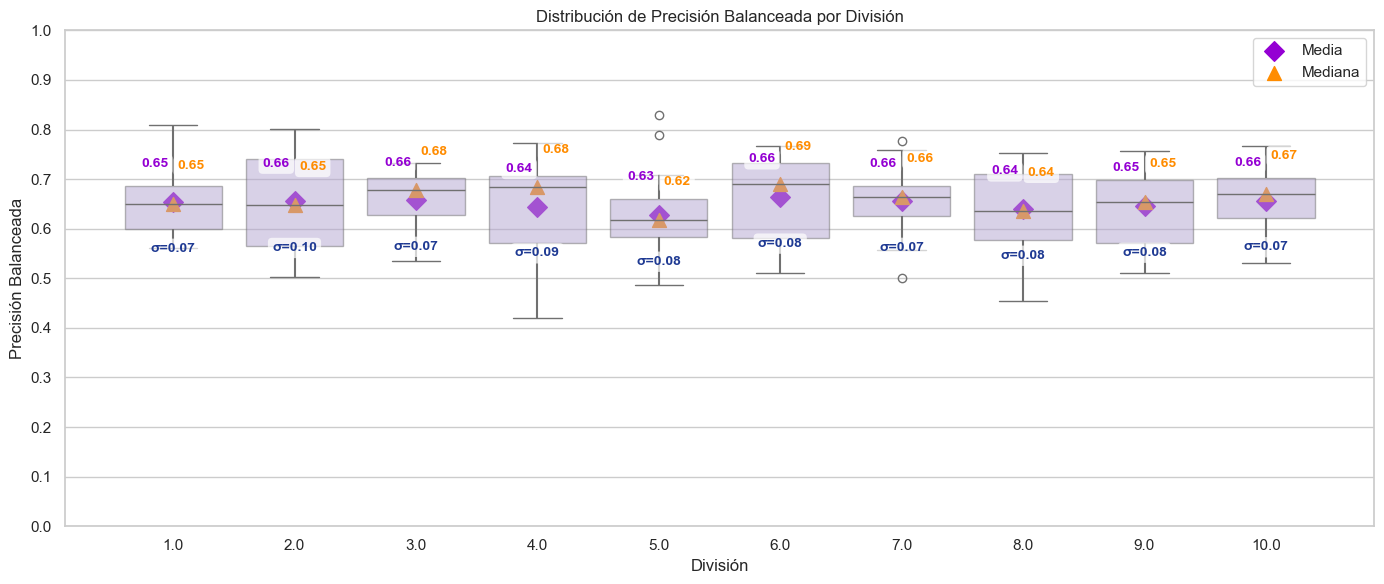

In [10]:
# Estilo general
sns.set(style="whitegrid")

# --- Boxplot de precisión balanceada por división (todos los modelos) ---
plt.figure(figsize=(14, 6))
ax = sns.boxplot(
    data=df,
    x="split",
    y="balanced_accuracy",
    color="#b19cd9",  # violeta pastel
    boxprops=dict(alpha=0.5),
    whiskerprops={'linewidth': 1.5}
)

# Obtener splits únicos para calcular estadísticas
splits = df['split'].unique()

# Para cada split, calcular media, mediana y desviación estándar y anotarlas
for i, split in enumerate(splits):
    data_split = df.loc[df['split'] == split, 'balanced_accuracy']
    mean_val = data_split.mean()
    median_val = data_split.median()
    std_val = data_split.std()

    # Media (diamante violeta oscuro)
    plt.scatter(i, mean_val, color='darkviolet', marker='D', s=100, label='Media' if i == 0 else "")
    # Mediana (triángulo naranja oscuro)
    plt.scatter(i, median_val, color='darkorange', marker='^', s=100, label='Mediana' if i == 0 else "")

    # Anotar media arriba y ligeramente a la izquierda
    plt.text(
        i - 0.15, mean_val + 0.07, f"{mean_val:.2f}", color='darkviolet', ha='center',
        fontsize=10, fontweight='bold',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.3')
    )
    # Anotar mediana arriba y ligeramente a la derecha
    plt.text(
        i + 0.15, median_val + 0.07, f"{median_val:.2f}", color='darkorange', ha='center',
        fontsize=10, fontweight='bold',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.3')
    )
    # Anotar desviación estándar debajo de la media
    plt.text(
        i, mean_val - 0.1, f"σ={std_val:.2f}", color='#1F3A93', ha='center',
        fontsize=10, fontweight='bold',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.3')
    )

# Título y etiquetas
plt.title("Distribución de Precisión Balanceada por División")
plt.xlabel("División")
plt.ylabel("Precisión Balanceada")

# Rango y ticks del eje Y
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))

# Leyenda y formato final
plt.legend()
plt.tight_layout()
plt.savefig("boxplot_per_split.png", dpi=300)
plt.show()

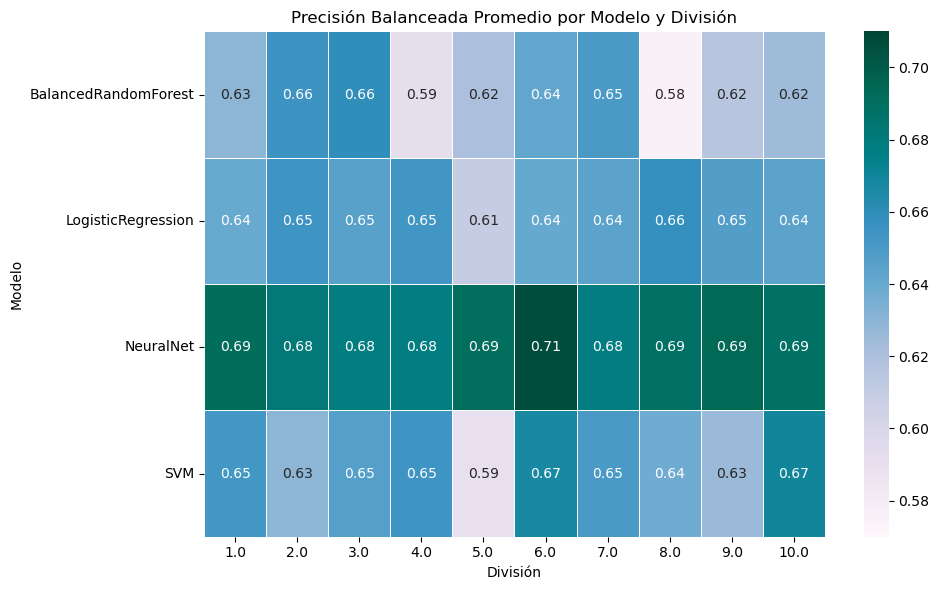

In [4]:
# Agrupar datos: media de precisión balanceada por modelo y división
heatmap_data = df.groupby(["model", "split"])["balanced_accuracy"].mean().unstack()

# Crear figura
plt.figure(figsize=(10, 6))

# Crear heatmap con anotaciones, usando un rango de color fijo entre 0.57 y 0.71
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="PuBuGn",
    fmt=".2f",
    linewidths=0.5,
    linecolor='white',
    vmin=0.57,
    vmax=0.71
)

# Títulos y etiquetas en español
plt.title("Precisión Balanceada Promedio por Modelo y División")
plt.xlabel("División")
plt.ylabel("Modelo")

# Ajustar diseño
plt.tight_layout()
plt.savefig("heatmap.png", dpi=300)
plt.show()